In [8]:
# First, let's import useful python libraries
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

In [10]:
# Let's take a look on the training csv file.

train_df = pd.read_csv('/Users/jaffer/Downloads/unifesp-x-ray-body-part-classifier/train.csv')
test_df = pd.read_csv('/Users/jaffer/Downloads/unifesp-x-ray-body-part-classifier/sample_submission.csv')

In [11]:
train_df.head(8)

SOPInstanceUID  Target  TRUE
0  1.2.826.0.1.3680043.8.498.10025629581362719970...       0   NaN
1  1.2.826.0.1.3680043.8.498.10036150326276641158...      15   NaN
2  1.2.826.0.1.3680043.8.498.10038426859954986240...      12   NaN
3  1.2.826.0.1.3680043.8.498.10050991192143676483...      14   NaN
4  1.2.826.0.1.3680043.8.498.10053309524595490852...       3   NaN
5  1.2.826.0.1.3680043.8.498.10053755320637729867...       3   NaN
6  1.2.826.0.1.3680043.8.498.10062189329714053601...      14   NaN
7  1.2.826.0.1.3680043.8.498.10065930002825553435...  13 20    NaN

In [12]:
#Let's  see our Target distribution

bodyparts = {
0 : 'Abdomen' ,
1 :'Ankle' ,
2 :'Cervical Spine',
3 : 'Chest' ,
4 :'Clavicles' ,
5 :'Elbow' ,
6 :'Feet' ,
7 : 'Finger' ,
8 : 'Forearm' ,
9 : 'Hand' ,
10 : 'Hip' ,
11 : 'Knee' ,
12 : 'Lower Leg' ,
13 : 'Lumbar Spine' ,
14 : 'Others' ,
15 :'Pelvis',
16 :'Shoulder' ,
17 :'Sinus' ,
18 : 'Skull' ,
19 : 'Thigh' ,
20 :'Thoracic Spine',
21: 'Wrist',
}



In [13]:
#DICOM file formats contains meta-data that can be useful for deep learning model preprocessing
#I'll use a funciton created by Felipe Kitamura to list the DICOM Tags from the files

def dcmtag2table(folder, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = []
    print("Listing all files...")
    start = time.time()
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            filelist.append(os.path.join(root, name))
    print("Time: " + str(time.time() - start))
    print("Reading files...")
    time.sleep(2)
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    print('Tags...')
    print(list_of_tags)
    print(test)
    for i, _tag in enumerate (list_of_tags):
        print(test[i])
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

## How to read Images from Dicom using Pydicom

In [ ]:
tags = ['PhotometricInterpretation','BitsAllocated', 'SOPInstanceUID' ]
dicom_tags_train =  dcmtag2table('/Users/jaffer/Downloads/unifesp-x-ray-body-part-classifier/train', tags)
dicom_tags_test = dcmtag2table('/Users/jaffer/Downloads/unifesp-x-ray-body-part-classifier/test', tags)

In [15]:
dicom_tags_train.head(10)

Filename  \
0  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
1  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
2  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
3  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
4  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
5  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
6  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
7  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
8  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   
9  /Users/jaffer/Downloads/unifesp-x-ray-body-par...   

  PhotometricInterpretation  BitsAllocated  \
0               MONOCHROME1             16   
1               MONOCHROME1             16   
2               MONOCHROME1             16   
3               MONOCHROME1             16   
4               MONOCHROME1             16   
5               MONOCHROME1             16   
6               MONOCHROME1             16   
7               MONOCHROME1             16   
8               MONOCHROME1             16   
9               MONOCHROME1             16   

                                      SOPInstanceUID  
0  1.2.826.0.1.3680043.8.498.21199751632414178657...  
1  1.2.826.0.1.3680043.8.498.11592311198629503991...  
2  1.2.826.0.1.3680043.8.498.71446631430051241458...  
3  1.2.826.0.1.3680043.8.498.88055284861184854928...  
4  1.2.826.0.1.3680043.8.498.56484102564630587042...  
5  1.2.826.0.1.3680043.8.498.11121020226184051416...  
6  1.2.826.0.1.3680043.8.498.51131472934860883412...  
7  1.2.826.0.1.3680043.8.498.44113339894940716093...  
8  1.2.826.0.1.3680043.8.498.11095150037018605367...  
9  1.2.826.0.1.3680043.8.498.44009236627941226682...

MONOCHROME1    1659
MONOCHROME2      79
Name: PhotometricInterpretation, dtype: int64
The following images are with Photometric Interpretation MONOCHROME1


/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


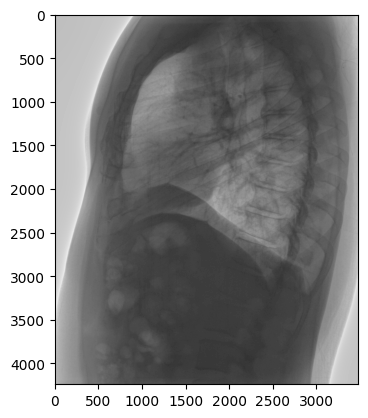

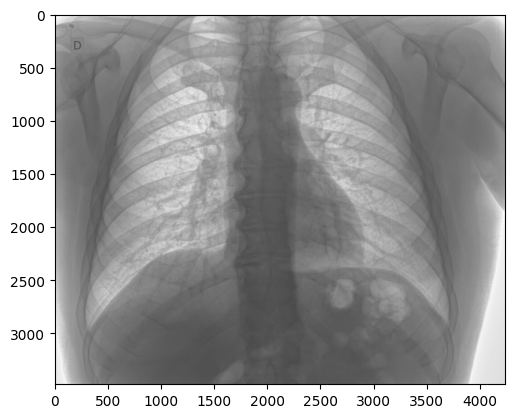

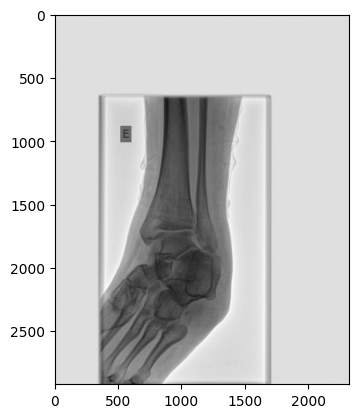

The following images are with Photometric Interpretation MONOCHROME2


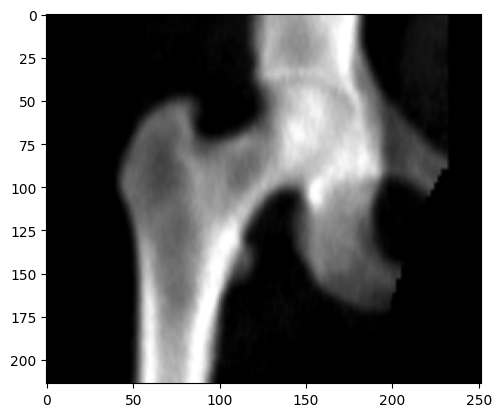

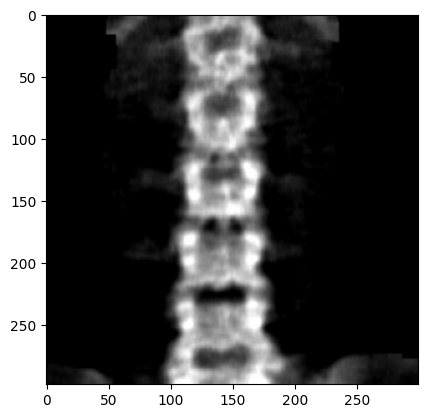

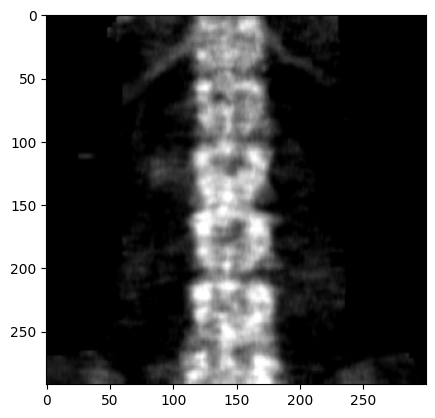

In [16]:
#Let's see the different type of Photometric Interpreation and how it affects the display of an image

print(dicom_tags_train.PhotometricInterpretation.value_counts())

print('The following images are with Photometric Interpretation MONOCHROME1')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

print('The following images are with Photometric Interpretation MONOCHROME2')

n = 0
for idx, row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME2'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

The following images are with Photometric Interpretation MONOCHROME1 but will be displayed as MONCHROME2


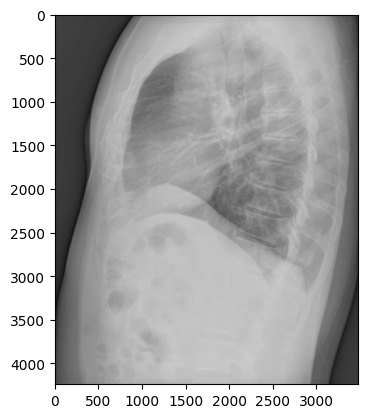

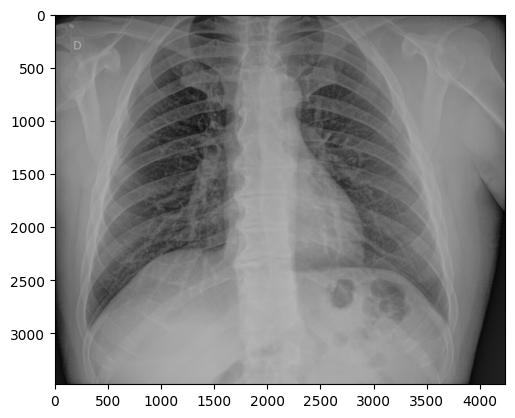

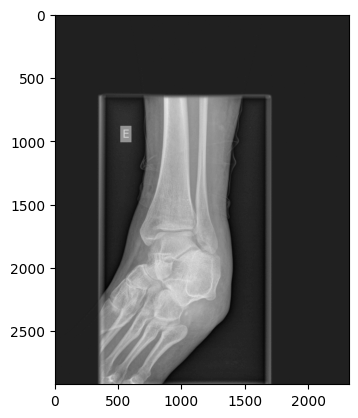

In [17]:
#You can use numpy invert() funciton to change the display of the Photometric Interpratation between two different MONCHROMEs

print('The following images are with Photometric Interpretation MONOCHROME1 but will be displayed as MONCHROME2')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(np.invert(img), cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break


In [18]:
train = dicom_tags_train.merge(train_df, on =  'SOPInstanceUID')
test = dicom_tags_test.merge(test_df,on =  'SOPInstanceUID')

In [19]:
labels = ['Abdomen', 'Ankle', 'Cervical Spine',
       'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand',
       'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis',
       'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

In [20]:
#Create Label from target
def no_to_label(label):
    label_list_string = []
    trimed_label = label.rstrip()
    label_list = trimed_label.split(" ")
    label_list = [int(i) for i in label_list]
    for label in label_list:
        label_list_string.append(bodyparts[label])
    label_string = ' and '.join(label_list_string)
    return label_string

# Create a new column with label
target_list = train['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
train['Label'] = label_column

#Now we can see the distribution
train['Label'].unique()

100%|██████████| 1738/1738 [00:00<00:00, 1310625.74it/s]


array(['Chest', 'Ankle', 'Abdomen', 'Clavicles', 'Shoulder', 'Hip',
       'Others', 'Ankle and Feet', 'Pelvis', 'Lower Leg',
       'Cervical Spine', 'Sinus', 'Finger and Hand', 'Abdomen and Chest',
       'Pelvis and Thigh', 'Thoracic Spine', 'Hand and Wrist', 'Skull',
       'Ankle and Knee and Lower Leg', 'Forearm', 'Feet', 'Knee', 'Elbow',
       'Lumbar Spine and Thoracic Spine', 'Hip and Thigh', 'Hand',
       'Lumbar Spine', 'Wrist', 'Hip and Knee and Thigh',
       'Cervical Spine and Lumbar Spine and Thoracic Spine', 'Thigh',
       'Chest and Finger', 'Ankle and Lower Leg', 'Finger',
       'Elbow and Forearm', 'Forearm and Shoulder', 'Knee and Lower Leg',
       'Cervical Spine and Thoracic Spine', 'Abdomen and Pelvis',
       'Chest and Feet', 'Chest and Pelvis'], dtype=object)

<AxesSubplot: xlabel='Label'>

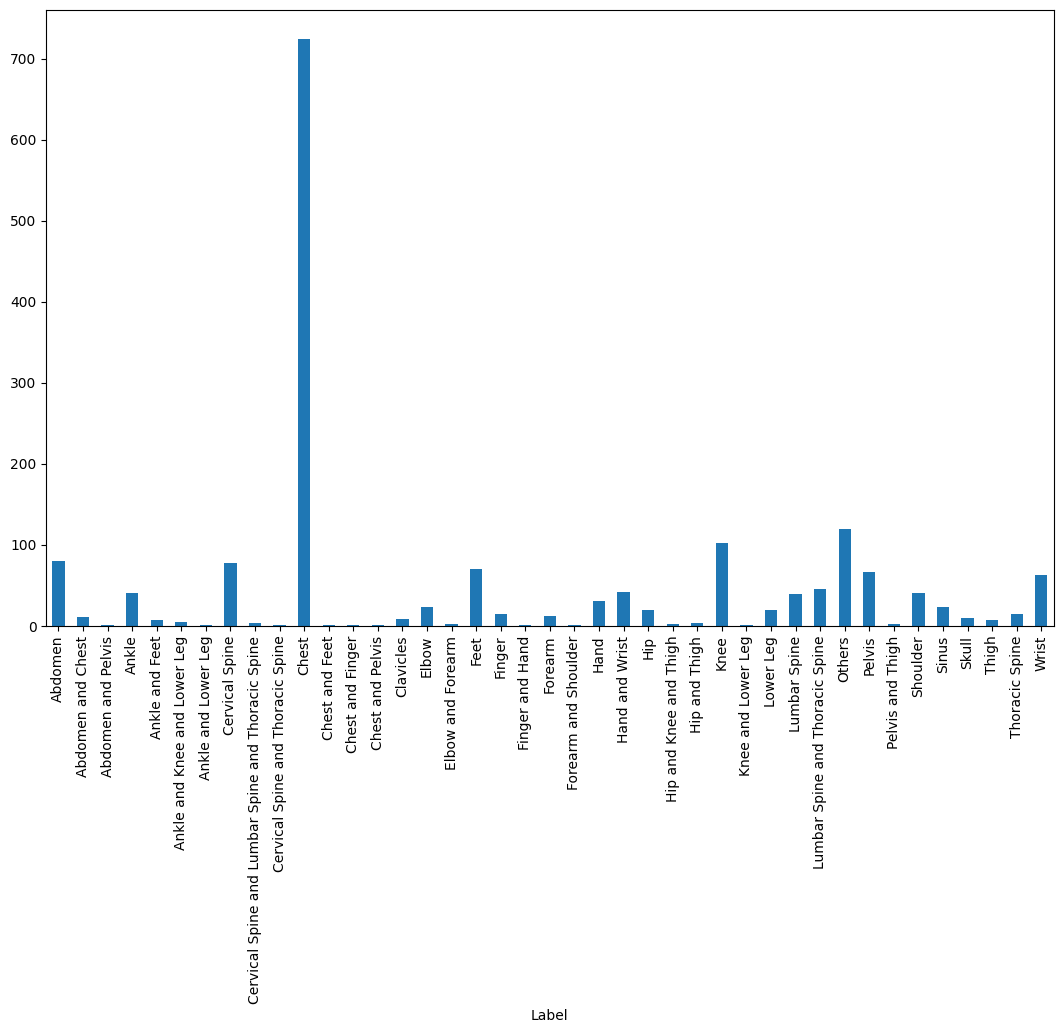

In [21]:
Grouped_target = train.groupby(by='Label').size()
%matplotlib inline
plt.rcParams["figure.figsize"] = (13,8)                              
Grouped_target.plot.bar()


In [22]:
train.Label.value_counts(normalize = True)

Chest                                                 0.416571
Others                                                0.069045
Knee                                                  0.058688
Abdomen                                               0.046030
Cervical Spine                                        0.044304
Feet                                                  0.040276
Pelvis                                                0.038550
Wrist                                                 0.036249
Lumbar Spine and Thoracic Spine                       0.025892
Hand and Wrist                                        0.024166
Ankle                                                 0.023590
Shoulder                                              0.023015
Lumbar Spine                                          0.022440
Hand                                                  0.017837
Sinus                                                 0.013234
Elbow                                                 0

In [23]:
train.Label.value_counts()

Chest                                                 724
Others                                                120
Knee                                                  102
Abdomen                                                80
Cervical Spine                                         77
Feet                                                   70
Pelvis                                                 67
Wrist                                                  63
Lumbar Spine and Thoracic Spine                        45
Hand and Wrist                                         42
Ankle                                                  41
Shoulder                                               40
Lumbar Spine                                           39
Hand                                                   31
Sinus                                                  23
Elbow                                                  23
Hip                                                    19
Lower Leg     

In [24]:
#We will drop rows from training data when the rows is lesser than 10
v = train.Label.value_counts()
train = train[train.Label.isin(v.index[v.gt(9)])]

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['LabelCat'] = le.fit_transform(train['Target'])
print(train['Label'])


0       Chest
1       Chest
2       Ankle
3       Ankle
4       Ankle
        ...  
1733    Chest
1734    Chest
1735    Chest
1736    Chest
1737    Chest
Name: Label, Length: 1688, dtype: object


In [27]:
# Creating Images for Training
!rm -r  ./TrainingImages
!mkdir ./TrainingImages

In [28]:
import pydicom as dicom
from PIL import Image, ImageOps
import os

images_path = "./TrainingImages"
ImagePath = []
file_name = train.Filename.to_list()
sop = train.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
train['Imagepath'] = ImagePath

0it [00:00, ?it/s]/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
239it [16:18,  5.23s/it]/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
833it [53:20,  4.17s/it]/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
1688it [1:43:44,  3.69s/it]


## Splitting dataframe from training and validation

In [29]:
#We are reserving 
train_data = train.sample(frac=0.9)
val_data = train.loc[~train['Filename'].isin(train_data['Filename'])].copy()

## Data augmentation we will not be using all augmentation since it x-Ray it will not make sense to do augmentations like vertical flipping

In [30]:
class DataAugmentation:
    def __init__(self,train,val,batch_size):
        self.train = train
        self.val = val
        self.test = test
        self.batch_size = batch_size
        
    def train_augment(self):
        train_datagen = ImageDataGenerator(
        brightness_range=[0.4,1.5],# brightness
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True)
        
        
        train_generator_df = train_datagen.flow_from_dataframe(dataframe=self.train, 
                                              directory=None,
                                              class_mode='raw',
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2020)
        
        return train_generator_df
    
    
    def valid_augment(self):
        val_datagen = ImageDataGenerator()
        
        val_generator_df = val_datagen.flow_from_dataframe(dataframe=self.val, 
                                              directory=None,
                                              class_mode='raw',            
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2021)
        
        return val_generator_df
        
    
        
        
        
    
        
    

In [31]:
#Augment image for training
dat_aug = DataAugmentation(train_data,val_data,64)
train_gen = dat_aug.train_augment()
val_gen = dat_aug.valid_augment()


Found 1519 validated image filenames.
Found 169 validated image filenames.


## Load Resnet model and train model 

In [32]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.mobilenet_v2 import MobileNetV2


In [33]:
resNet50 = ResNet50V2(input_shape=(224,224,3),include_top=False)
resNet50.trainable = False

In [34]:
mobileNetV2 = MobileNetV2(input_shape=(224,224,3),include_top=False)
mobileNetV2.trainable = False

## Freezing resNet50 layers for training and making last few layers ready for training

In [35]:
# deep learning libraries
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D

model = tf.keras.Sequential([
        resNet50,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
    # We are using last layer which is equal to number label catagories in training data
        tf.keras.layers.Dense(len(train['LabelCat'].unique()), activation='softmax')
    ])


In [36]:
# deep learning libraries
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D

model2 = tf.keras.Sequential([
        mobileNetV2,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
    # We are using last layer which is equal to number label catagories in training data
        tf.keras.layers.Dense(len(train['LabelCat'].unique()), activation='softmax')
    ])

## Training the model with F1 as metrics

In [6]:
from tensorflow.keras import backend as K

def f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [70]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [56]:
def focal_loss(gamma=2., alpha=4.):

    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [71]:
def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1+K.epsilon())) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
	return focal_loss_fixed

In [68]:
import tensorflow_addons as tfa
from sklearn.metrics import balanced_accuracy_score
# from focal_loss import SparseCategoricalFocalLoss

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1])

In [77]:
model2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy',recall_m, precision_m, f1_m])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 2048)       14336     
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 1280)       8960      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 512)               655872    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                      

In [ ]:

early = tf.keras.callbacks.EarlyStopping( patience=20,
                                          min_delta=0.0001,
                                          restore_best_weights=True)

In [69]:
# fit model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[early])

Epoch 1/100
24/24 [==============================] - 258s 11s/step - loss: 7.3418 - accuracy: 0.3311 - recall_m: 8.0887 - precision_m: 35.4729 - f1: 12.6804 - val_loss: 2.5882 - val_accuracy: 0.4201 - val_recall_m: 8.0879 - val_precision_m: 113.3111 - val_f1: 15.0922
Epoch 2/100
24/24 [==============================] - 245s 10s/step - loss: 2.6215 - accuracy: 0.4233 - recall_m: 6.0095 - precision_m: 19.0444 - f1: 9.0512 - val_loss: 2.3855 - val_accuracy: 0.4201 - val_recall_m: 9.0576 - val_precision_m: 65.1945 - val_f1: 15.6389
Epoch 3/100
24/24 [==============================] - 250s 10s/step - loss: 2.3421 - accuracy: 0.4292 - recall_m: 5.8283 - precision_m: 16.7877 - f1: 8.6005 - val_loss: 2.3494 - val_accuracy: 0.4024 - val_recall_m: 8.0801 - val_precision_m: 42.4472 - val_f1: 13.3403
Epoch 4/100
24/24 [==============================] - 251s 10s/step - loss: 2.1914 - accuracy: 0.4305 - recall_m: 5.7264 - precision_m: 15.1899 - f1: 8.2305 - val_loss: 2.2271 - val_accuracy: 0.4438 - 

In [78]:
history_model2 = model2.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[early])

Epoch 1/100
24/24 [==============================] - 243s 10s/step - loss: 2.2998 - accuracy: 0.4220 - recall_m: 5.5662 - precision_m: 262499984.0000 - f1_m: 8.5954 - val_loss: 1.9379 - val_accuracy: 0.4852 - val_recall_m: 6.4379 - val_precision_m: 19.3889 - val_f1_m: 9.6267
Epoch 2/100
24/24 [==============================] - 234s 10s/step - loss: 1.9211 - accuracy: 0.4773 - recall_m: 5.0121 - precision_m: 13.9584 - f1_m: 7.2172 - val_loss: 1.6991 - val_accuracy: 0.5030 - val_recall_m: 4.8453 - val_precision_m: 10.1606 - val_f1_m: 6.5367
Epoch 3/100
24/24 [==============================] - 235s 10s/step - loss: 1.6625 - accuracy: 0.5411 - recall_m: 4.4836 - precision_m: 9.8573 - f1_m: 6.1350 - val_loss: 1.5318 - val_accuracy: 0.5680 - val_recall_m: 4.4575 - val_precision_m: 8.6600 - val_f1_m: 5.8845
Epoch 4/100
24/24 [==============================] - 235s 10s/step - loss: 1.5063 - accuracy: 0.5635 - recall_m: 4.1548 - precision_m: 8.4563 - f1_m: 5.5599 - val_loss: 1.4351 - val_accura

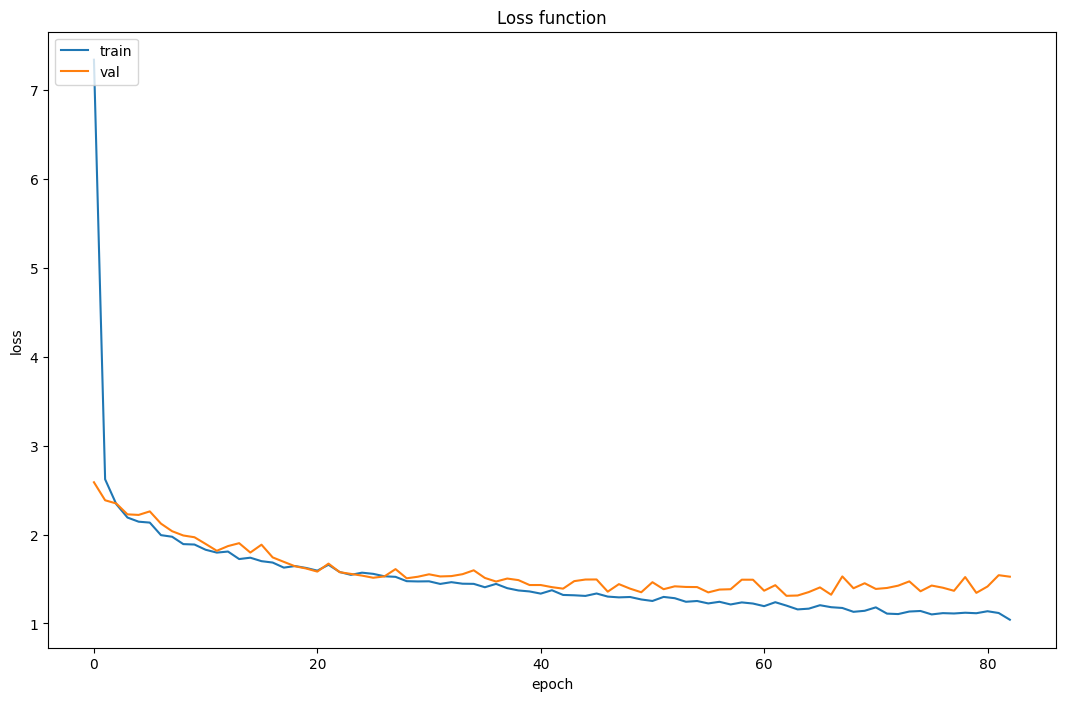

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

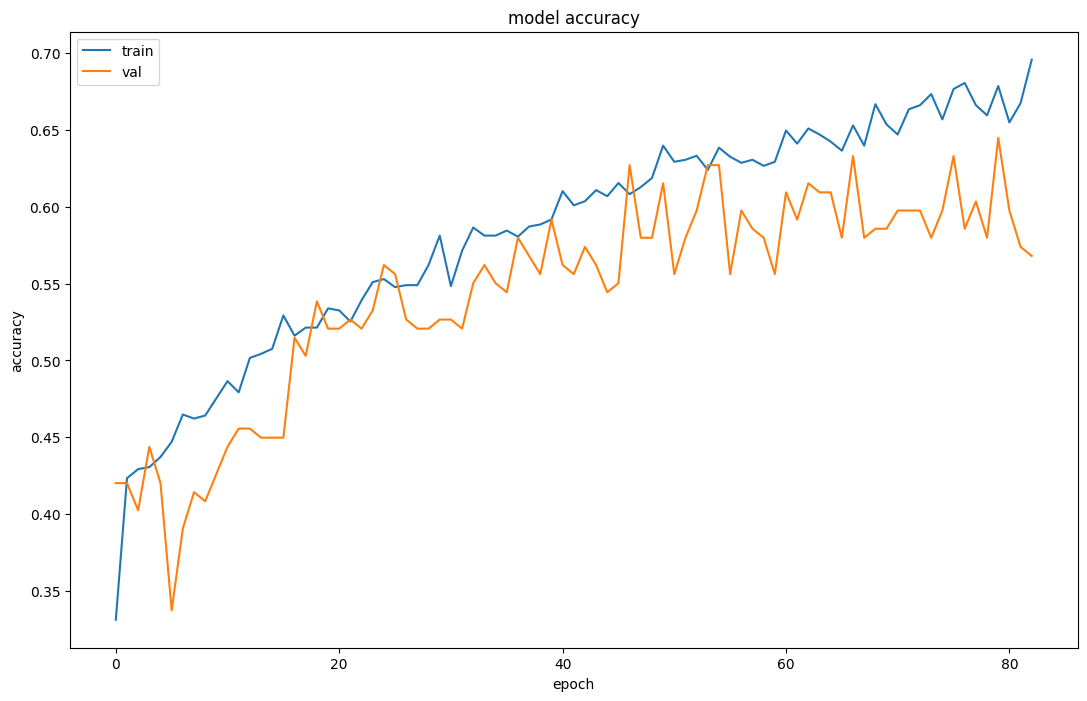

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

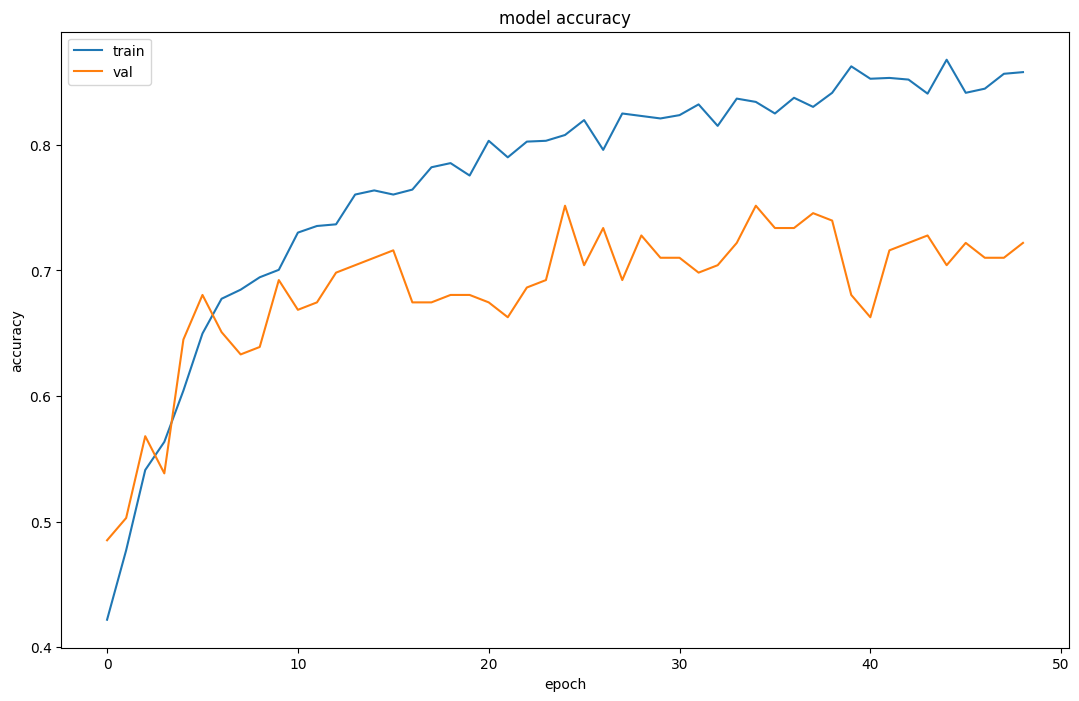

In [81]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# import joblib

# filename = "savedModel2_take4(.85).joblib"
# joblib.dump(model2, filename)

#model.save("resnet50-71.h5")
# model2.save("mobileNet-72.h5")



## Saving model and loading it

In [ ]:
#model2.save("myClassifier.h5")
#file = "1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056.png"
img = cv2.imread('testDir/Prediction/1.2.826.0.1.3680043.8.498.78821712082546284288318241228027008291.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[224, 224, 3])
# images_list = []
images_list = []
images_list.append(np.array(img))
x = np.asarray(images_list)
model.predict(x).round()

1/1 [==============================] - 1s 1s/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# dir_loaded = filepath=test
loaded_model = tf.keras.models.load_model('myClassifier.h5', custom_objects={"f1": f1})
file = "1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056.png"
loaded_model(file)

TypeError: Inputs to a layer should be tensors. Got: 1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056.png

In [ ]:
dir_loaded = "./TrainedModels/savedModel2_take4(.85).joblib"
loaded_model = tf.keras.models.load_model(dir_loaded, custom_objects={'f1':f1})
file = "1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056.png"
result = loaded_model.score(file)
print(result)


In [ ]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model2, pickle_out) 
pickle_out.close()

INFO:tensorflow:Assets written to: ram://62c0acc8-72fc-4ab1-981e-3f627be13e9a/assets


INFO:tensorflow:Assets written to: ram://62c0acc8-72fc-4ab1-981e-3f627be13e9a/assets


In [ ]:
pickle_in = open('classifier.pkl', 'rb') 
classifier = tf.keras.models.load_model(pickle_in, compile=False)

In [14]:
import tensorflow as tf

# filename2 = "savedModelResNet50.joblib"
#joblib.dump(model, filename2)
#Resnet50
dir_loaded ="TrainedModels/resnet50-71.h5"
loaded_model = tf.keras.models.load_model(dir_loaded, custom_objects={'f1':f1})
# MobileNet
dir_loaded2 ="TrainedModels/resnet50-71.h5"
loaded_model2 = tf.keras.models.load_model(dir_loaded, custom_objects={'f1':f1})
loaded_model3 = tf.keras.models.load_model('mobileNet-78.h5', custom_objects={'f1':f1})


img = cv2.imread('testDir/Prediction/1.2.826.0.1.3680043.8.498.78821712082546284288318241228027008291.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[224, 224, 3])
# images_list = []
images_list = []
images_list.append(np.array(img))
x = np.asarray(images_list)
prediction = loaded_model3.predict(x)
label = prediction.argmax(axis=-1)

    
#t = train.loc[train['LabelCat'] == label, 'Label'].iloc[0]
print(label)
print(prediction)

1/1 [==============================] - 0s 498ms/step
[21]
[[3.7124777e-05 9.7008551e-06 2.5095278e-04 6.8709147e-03 4.9350448e-03
  2.2212914e-04 6.6375302e-05 2.1495899e-04 2.7337165e-03 4.7320887e-03
  3.5564596e-04 1.4225634e-05 3.2265671e-05 5.8987913e-05 9.1009373e-05
  3.7379038e-02 7.7489915e-04 3.1723904e-03 3.1912278e-02 1.4074823e-01
  9.1977723e-05 4.9928132e-01 2.6601481e-01]]


## Let's try and use Adaboosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from keras.wrappers.scikit_learn import KerasRegressor

boost = KerasRegressor(build_fn= model, epochs=100, batch_size=10, verbose=0)

adaclf = AdaBoostClassifier(base_estimator=boost,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1,
                            )


# adaclf.fit(train_gen, val_gen)




/var/folders/yx/vcy0strs4yd5vc5rb7c5j3k80000gn/T/ipykernel_43156/2432971106.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  boost = KerasRegressor(build_fn= model, epochs=100, batch_size=10, verbose=0)


: 

: 

## Let us try to predict test data

In [ ]:
!rm -r  testDir
!mkdir testDir
!mkdir testDir/Prediction

In [ ]:
images_path = "./testDir/Prediction"
ImagePath = []
file_name = test.Filename.to_list()
sop = test.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
test['Imagepath'] = ImagePath

0it [00:00, ?it/s]/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
59it [03:53,  4.74s/it]/opt/homebrew/lib/python3.9/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
743it [53:19,  4.31s/it]


In [82]:
import os

# folder path
dir_path = './testDir/Prediction'

# list to store files
os.listdir(dir_path)[:3]

['1.2.826.0.1.3680043.8.498.13369409143824037969393674082511348840.png',
 '1.2.826.0.1.3680043.8.498.90432844205800866065074606941923584031.png',
 '1.2.826.0.1.3680043.8.498.64695143207725149148205828729873537946.png']

In [83]:
# Create a new column with label
target_list = test['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
test['Label'] = label_column

#Now we can see the distribution
test['Label'].unique()

100%|██████████| 743/743 [00:00<00:00, 177197.24it/s]


array(['Abdomen and Ankle and Cervical Spine and Chest and Clavicles and Elbow and Feet and Finger and Forearm and Hand and Hip and Knee and Lower Leg and Lumbar Spine and Others and Pelvis and Shoulder and Sinus and Skull and Thigh and Thoracic Spine and Wrist'],
      dtype=object)

## Generate Test generator for prediction

In [84]:
from pathlib import Path

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_path = Path('./testDir')
test_generator = test_datagen.flow_from_directory(
    directory= test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 743 images belonging to 1 classes.


In [104]:
# Predicting the test 
prediction = model2.predict(test_generator)
# model.evaluate(test_generator)


24/24 [==============================] - 101s 4s/step


In [ ]:
model2.evaluate(test_generator)

In [89]:
test = train.loc[train['LabelCat'] == label, 'Label'].iloc[0]
print(test)

IndexError: single positional indexer is out-of-bounds

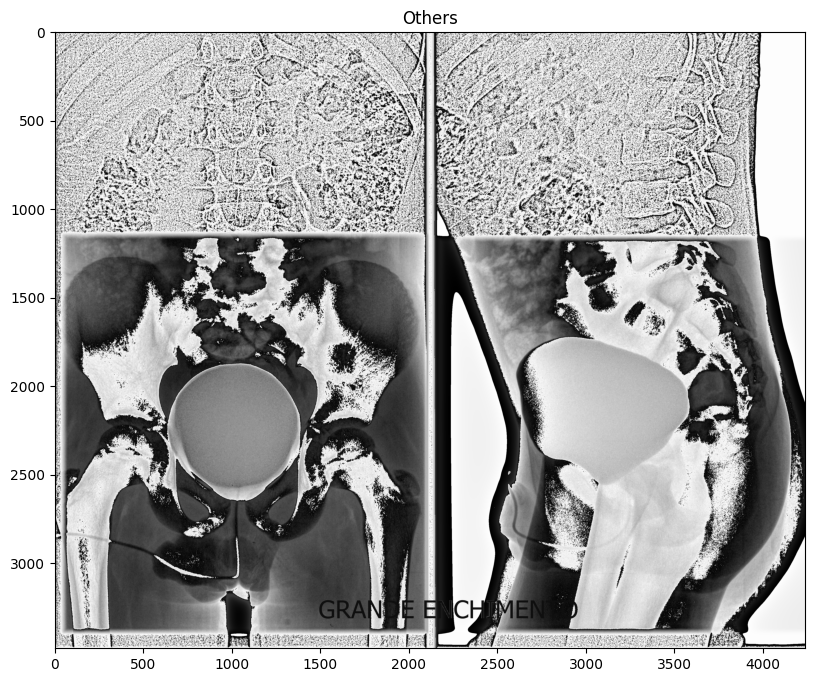

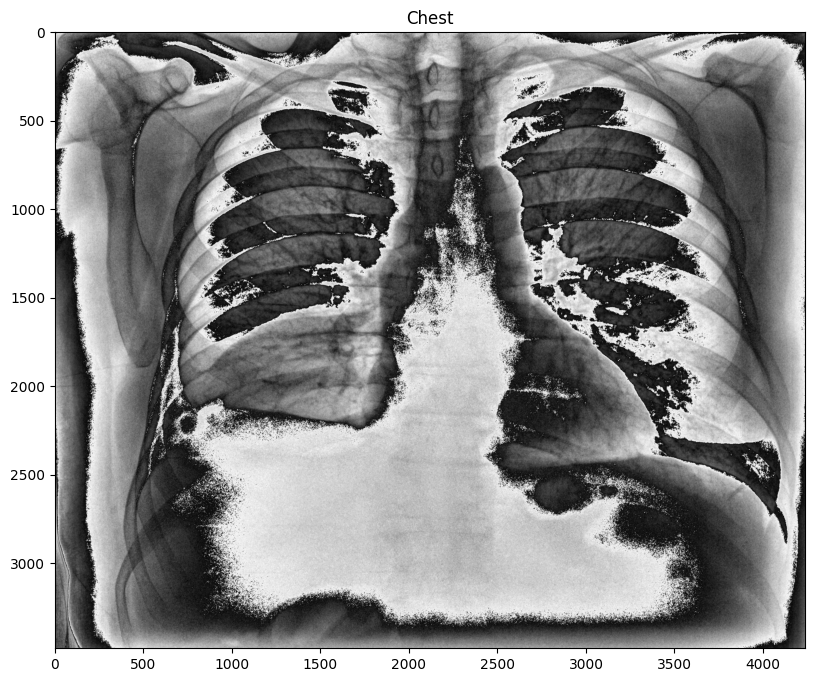

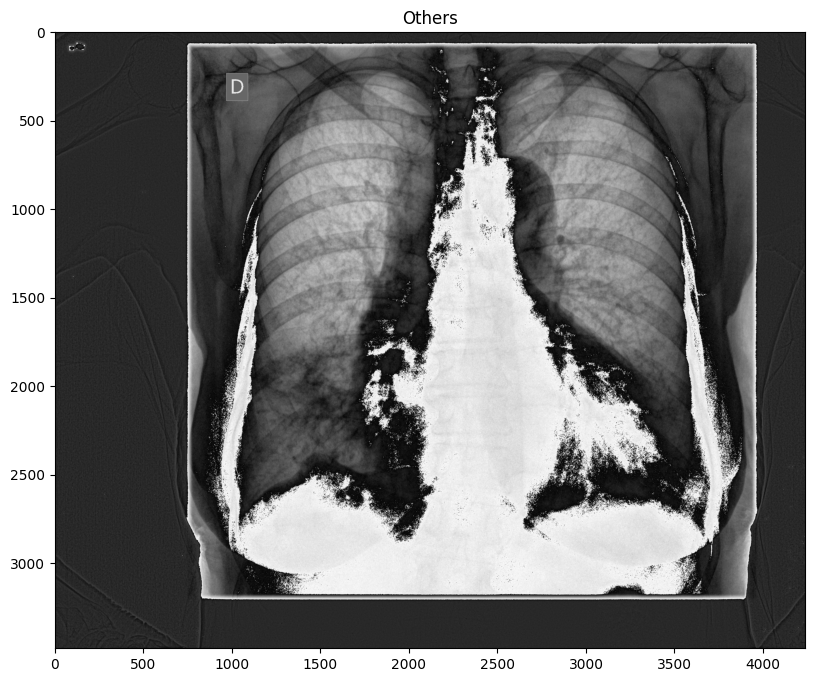

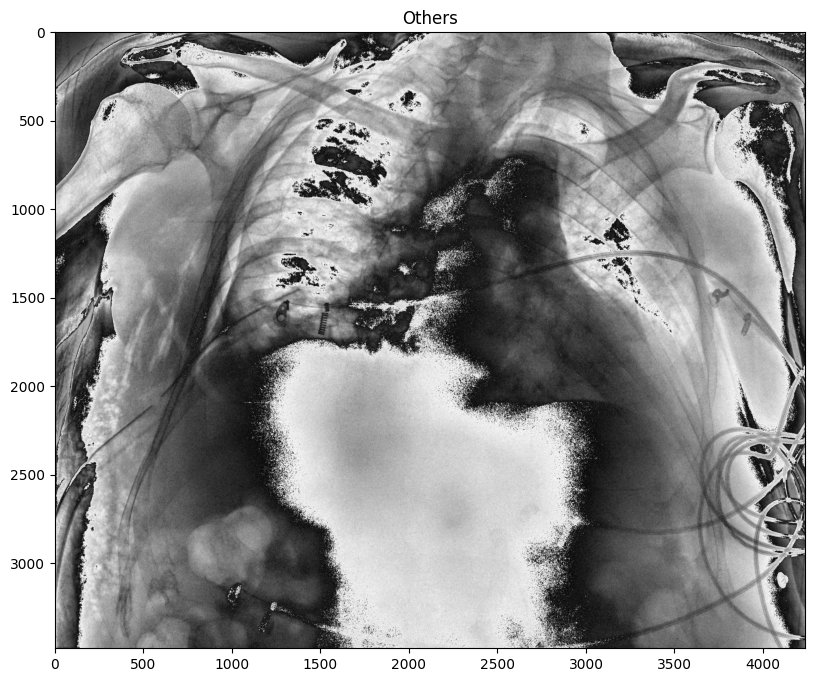

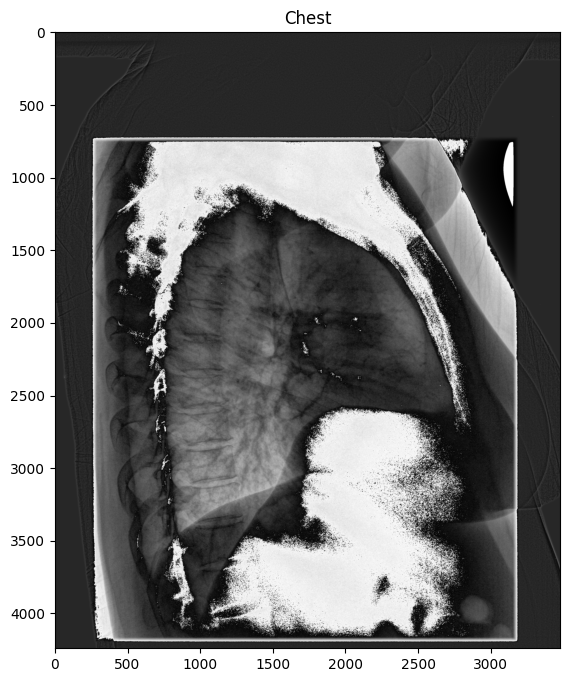

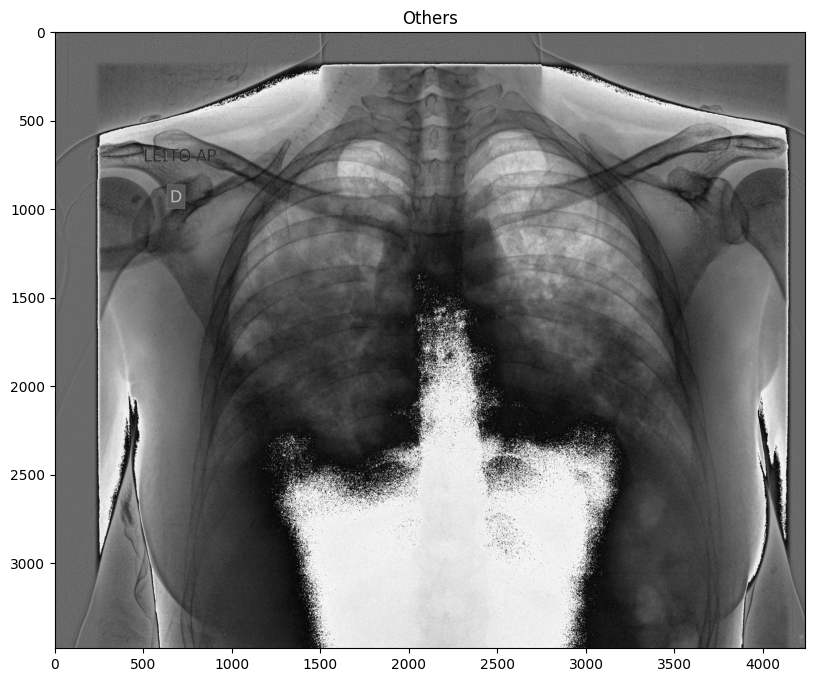

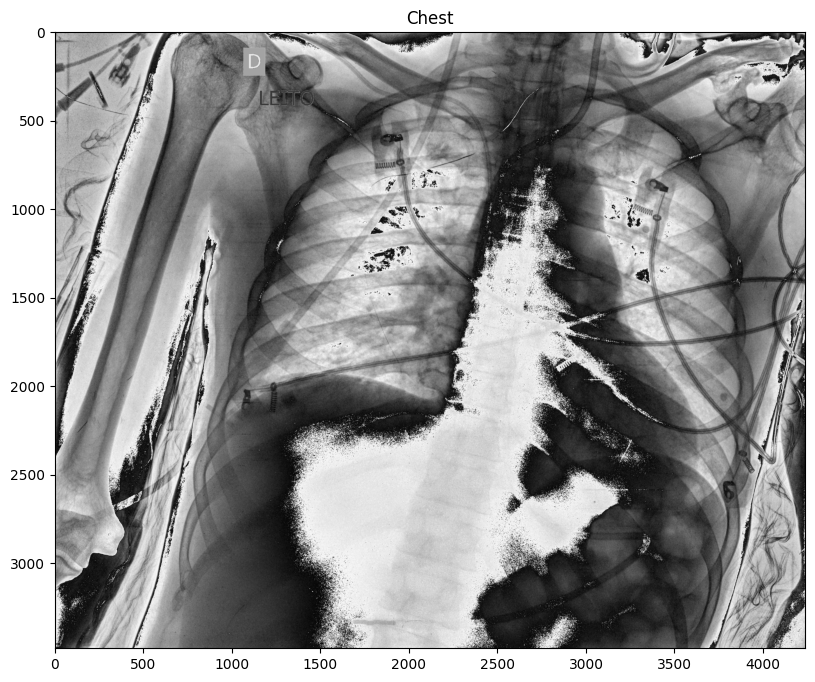

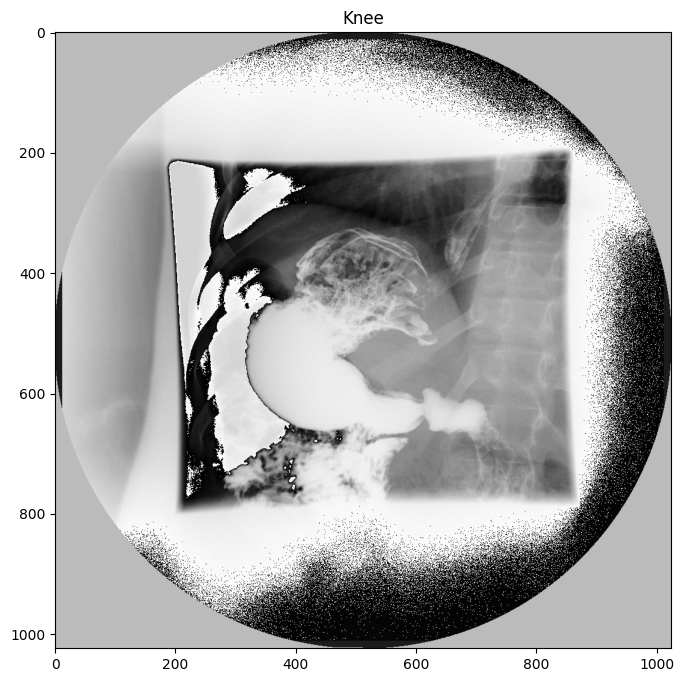

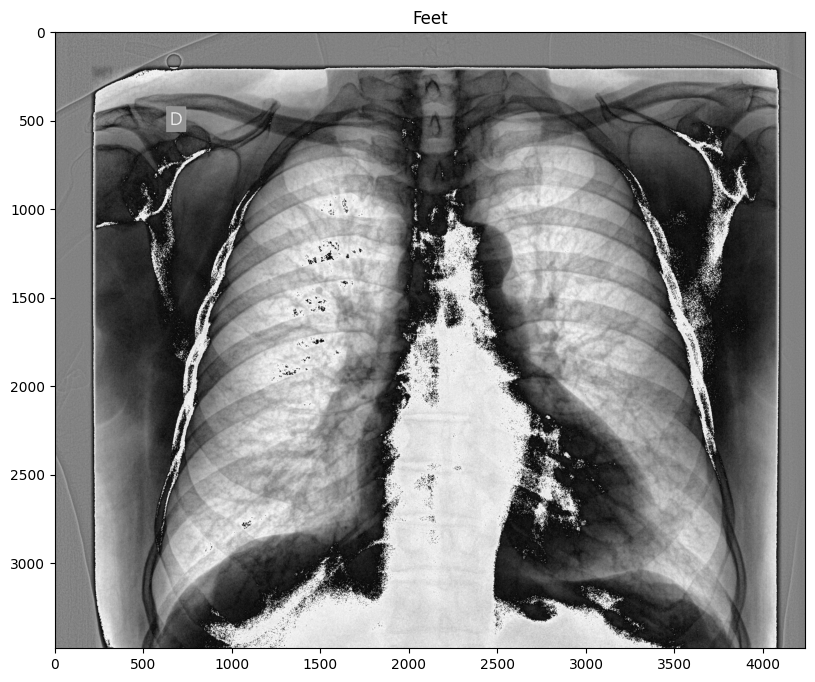

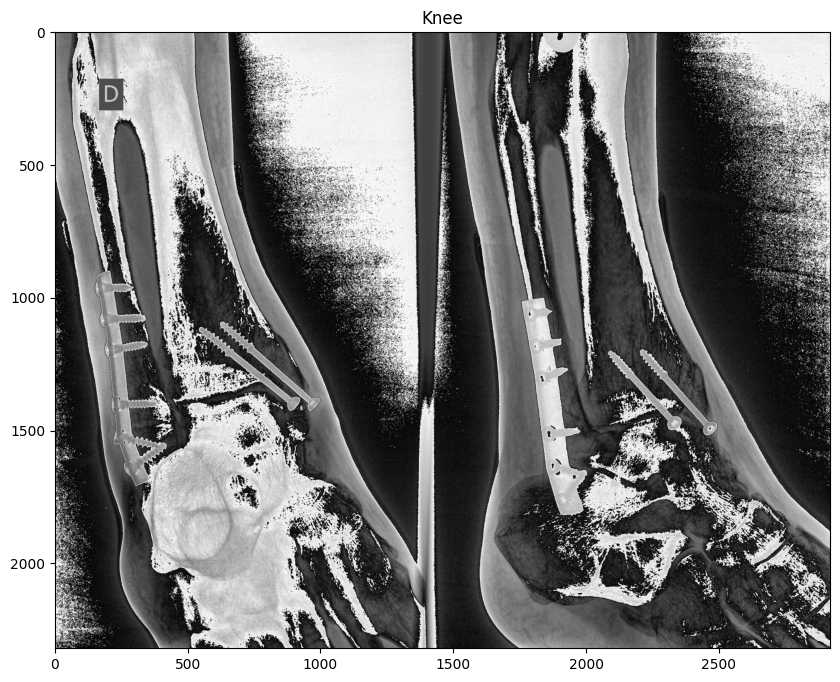

In [105]:
test_path = './testDir/Prediction'
first_ten_prediction = prediction[:10]
first_ten_images = os.listdir(test_path)[:10]
data = []

for file,prediction in zip(first_ten_images,first_ten_prediction): 
    
    img = cv2.imread(os.path.join(test_path,file))
    data.append(img) 
    plt.figure() 
    label = prediction.argmax(axis=-1)
    title = train.loc[train['LabelCat'] == label, 'Label'].iloc[0]
    Target = train.loc[train['LabelCat'] == label, 'Target'].iloc[0]
    plt.title(title)
    plt.imshow(img) 



In [ ]:
#Generating Target through model predictions
Target = []
for predict in prediction:
    label = predict.argmax(axis=-1)
    Target.append(train.loc[train['LabelCat'] == label, 'Target'].iloc[0])
    
submission['Target'] = Target

NameError: name 'submission' is not defined